In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.constant([1,1])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1])>

In [2]:
V_1 = []
V_min = []
V_rand = []

M = 1000
trials = 100000
N = 10
p=0.5

heads_array = []

for trial in range(trials):
    for coin in range(M):
        n_heads = np.random.binomial(N, p)
        heads_array.append(n_heads)
    V_1.append(heads_array[0])
    V_min.append(np.min(heads_array))
    idx = np.random.randint(0,M)
    V_rand.append(heads_array[idx])
    heads_array = []



(0.0, 1.0)

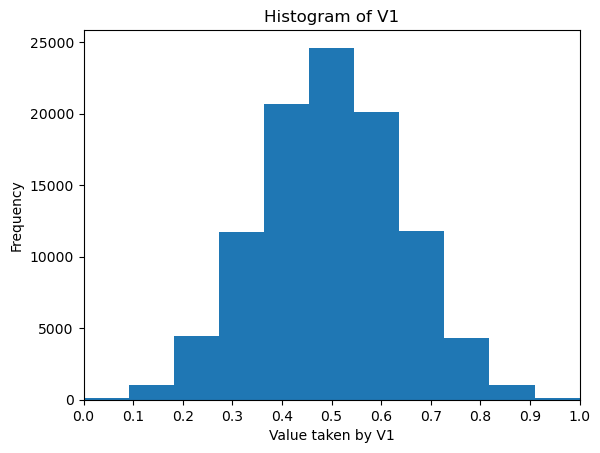

In [10]:
V1 = np.array(V_1)/N
plt.hist(V1, bins=11)
plt.title("Histogram of V1")
plt.xlabel("Value taken by V1")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,12,1)/10)
plt.xlim([0,1])

(0.0, 1.0)

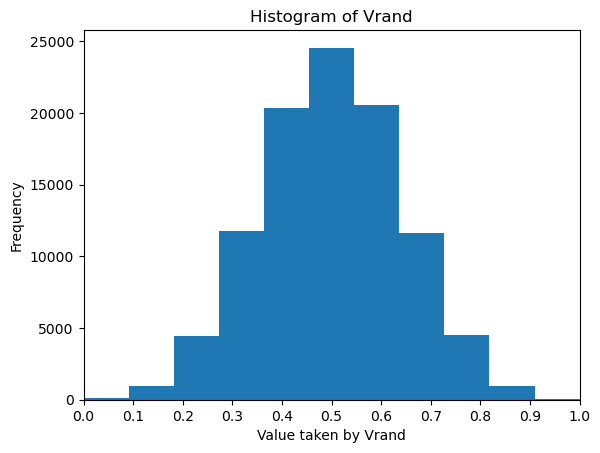

In [11]:
Vrand = np.array(V_rand)/N
plt.hist(Vrand, bins=11)
plt.title("Histogram of Vrand")
plt.xlabel("Value taken by Vrand")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,12,1)/10)
plt.xlim([0,1])

(0.0, 0.2)

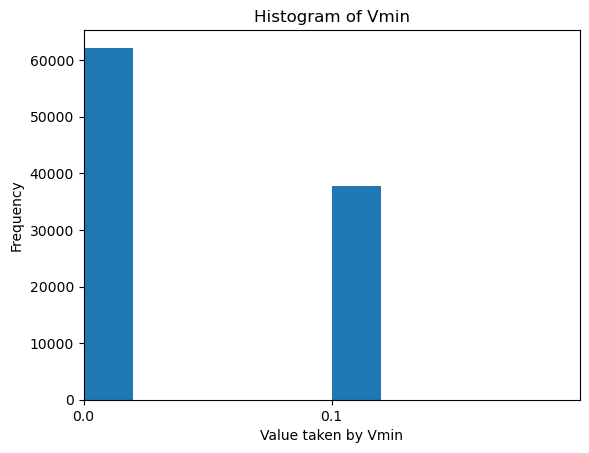

In [12]:
Vmin = np.array(V_min)/N
plt.hist(Vmin)
plt.title("Histogram of Vmin")
plt.xlabel("Value taken by Vmin")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,2,1)/10)
plt.xlim([0,0.2])

In [6]:
mu_1 = 0.5
mu_rand = 0.5
mu_min = 0.5
V = np.array([V1, Vrand, Vmin])
mu = np.array([0.5, 0.5, 0.5])

epilson = np.linspace(0,0.5,11)
Prob = np.zeros((len(V)+1, len(epilson)))
for e in range(len(epilson)):
    for idx in range(len(V)):
        count = np.count_nonzero((np.abs(V[idx] - mu[idx]))>epilson[e])
        Prob[idx,e] = count/trials
    Prob[idx+1,e] = 2*np.exp(-2*(epilson[e]**2)*N)

Prob = Prob


Text(0, 0.5, 'Probability')

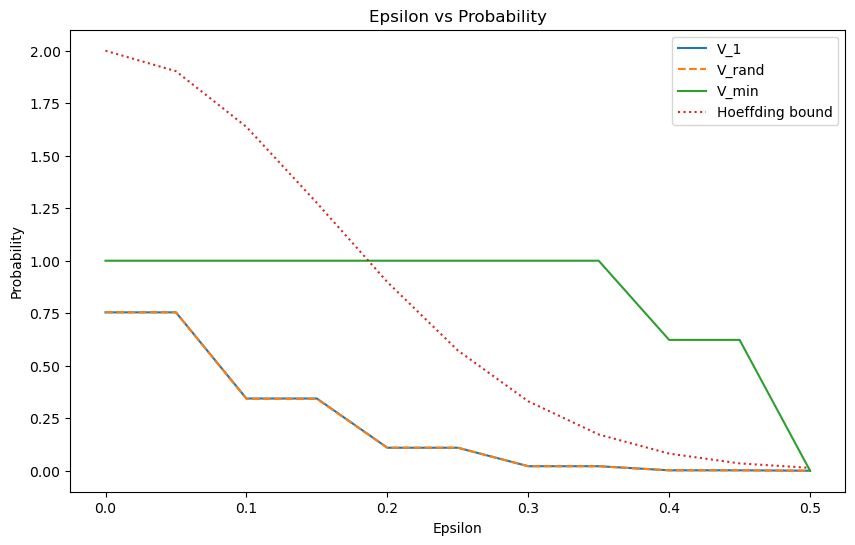

In [14]:
marker = ["solid", "dashed", "solid", "dotted"]
plt.figure(figsize=(10,6))
for i, vector in enumerate(Prob):
    plt.plot(epilson, vector, linestyle=marker[i])
plt.legend(["V_1", "V_rand", "V_min", "Hoeffding bound"])
plt.title("Epsilon vs Probability")
plt.xlabel("Epsilon")
plt.ylabel("Probability")